The output file is saved at /home/student/s1280181/PM24HeavyPollutionRecordingSensors.csv
Database size (total no of transactions) : 334
Number of items : 809
Minimum Transaction Size : 4
Average Transaction Size : 181.94910179640718
Maximum Transaction Size : 616
Standard Deviation Transaction Size : 138.33970744107367
Variance in Transaction Sizes : 19195.34574994156
Sparsity : 0.7750938173097562


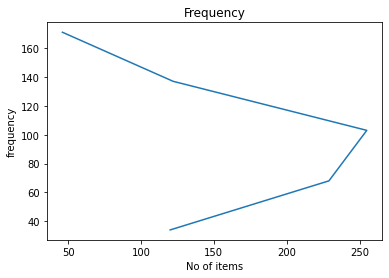

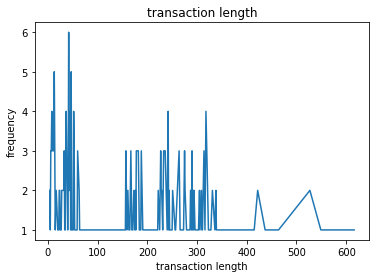

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Frequent patterns were generated successfully using frequentPatternGrowth algorithm


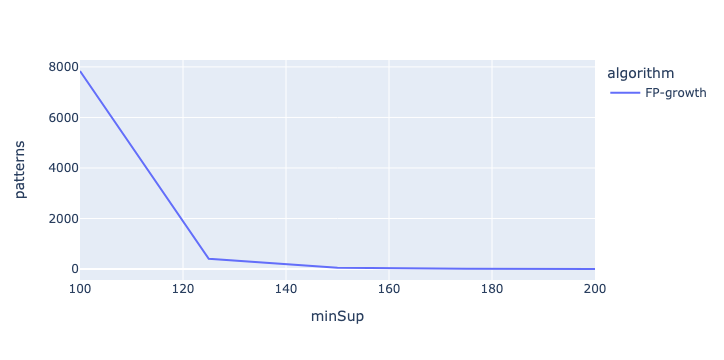

In [9]:
from PAMI.extras.DF2DB import denseDF2DB as pro 
from PAMI.frequentPattern.basic import FPGrowth as alg
from PAMI.extras.graph import dataFrameInToFigures as dif
import pandas as pd
import PAMI.extras.dbStats.transactionalDatabaseStats as stats
df = pd.read_csv("air_pollution_data.csv") # CSVファイルを読み込む
df = df.drop(["Timestamp"], axis=1) # "b"と"d"という名前の列を削除する
# Objective: convert the above dataframe into a transactional database with items whose value is greater than or equal 1.
db = pro.denseDF2DB(df, thresholdValue=15, condition='>=')
# Convert and store the dataframe as a transactional database file
db.createTransactional(outputFile='/home/student/s1280181/PM24HeavyPollutionRecordingSensors.csv')
# Getting the fileName of the transactional database
print('The output file is saved at ' + db.getFileName())
inputFile = 'PM24HeavyPollutionRecordingSensors.csv'
obj=stats.transactionalDatabaseStats(inputFile,sep='\t') 
obj.run()
obj.printStats() 
obj.plotGraphs()
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

minimumSupportList = [100,125,150,175,200]
algorithm = 'FP-growth'

for minSup in minimumSupportList:
    #Create the object
    obj = alg.FPGrowth(inputFile, minSup, '\t')
    #start the mining process
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSup, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
    
ab = dif.dataFrameInToFigures(result)

ab.plotGraphsFromDataFrame()

In [11]:

#import the frequent pattern mining algorithm
from PAMI.frequentPattern.basic import FPGrowth as alg

#inputFile = 'fileName'
inputFile = 'PM24HeavyPollutionRecordingSensors.csv'

#specify the constraints used in the model
minSup=125

#create the object of the mining algorithm 
obj = alg.FPGrowth(inputFile, minSup)

#start the mining process
obj.startMine()

#Print the number of interesting patterns generated
print("Total number of Frequent Patterns:", len(obj.getPatterns()))

#Save the generated patterns in a file
obj.save('frequentPatterns.txt')

# Determine the memory consumed by the mining algorithm
print("Total Memory in RSS", obj.getMemoryRSS())

# Determine the total runtime consumed by the mining algorithm
print("Total ExecutionTime in seconds:", obj.getRuntime())

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 404
Total Memory in RSS 13913632768
Total ExecutionTime in seconds: 0.43183112144470215


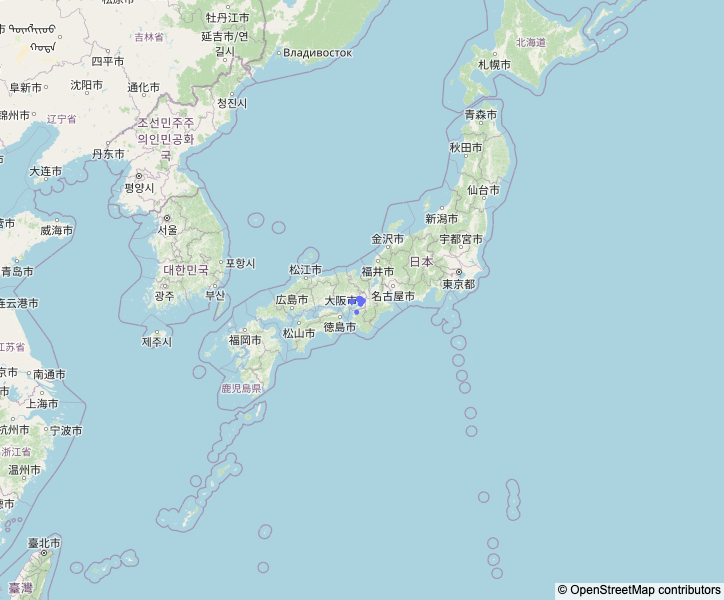

In [43]:
import pandas as pd
import re
import plotly.express as px
# テキストファイルを読み込む
df = pd.read_csv("frequentPatterns.txt", sep=":",header = None)
grid = pd.DataFrame(columns=['x','y'])
# score列をタブ文字で分割してリストに変換する
df.iloc[:,0] = df.iloc[:,0].str.split("\t")
df["length"] = df.iloc[:,0].apply(len)

max_row = df.loc[df["length"] == df["length"].max()]
columns = ["Point","freq","length"]
max_row.columns = columns
pattern = r"[-+]?[.]?\d+(?:,\d\d\d)*[.]?\d*(?:[eE][-+]?\d+)?"

for itr in max_row["Point"]:
    itr = [re.findall(pattern, s) for s in itr]
    for jitr in itr:
        jitr = list(map(float,jitr))
        grid.loc[len(grid)] = jitr

fig = px.scatter_mapbox(
    data_frame=max_row, 
    lat= grid.y, 
    lon= grid.x, 
    
    hover_name=None,
    hover_data=None,
    color=None,
    #size="stationId",
    #size_max=30,
    opacity=1.0,
    
    center={"lat": 34.686567, "lon":135.52000},
    zoom=4,
    height=600,
    width=800)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title_text="Station Info")
fig.show()
# データフレームを表示する
# データフレームを表示する

